## **SOBRE O ESTUDO**

O vinho é uma bebida alcoólica feita a partir de uvas fermentadas. A levedura consome o açúcar das uvas e o converte em etanol, dióxido de carbono e calor. É uma bebida alcoólica de sabor agradável.

A ideia central deste trabalho é aplicar um modelo de regressão para tentar prever a qualidade do vinho. 

A base de dados utilizada neste estudo foi baixada no site da [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality). 




## **SOBRE OS DADOS**

1 - acidez fixa 

2 - acidez volátil 

3 - ácido cítrico 

4 - açúcar residual 

5 - cloretos 

6 - dióxido de enxofre livre 

7 - dióxido de enxofre total 

8 - densidade 

9 - pH 

10 - sulfatos 

11 - álcool Variável de saída (com base em dados sensoriais): 

12 - qualidade (pontuação entre 0 e 10)

**Notas UCI sobre o conjunto de dados:**

As classes são ordenadas e não equilibradas (por exemplo, há muito mais vinhos normais do que excelentes ou pobres).
Algoritmos de detecção de outliers podem ser usados ​​para detectar os poucos vinhos excelentes ou ruins.
Além disso, não temos certeza se todas as variáveis ​​de entrada são relevantes. Portanto, pode ser interessante testar métodos de seleção de recursos.

## **CONCEITO DE REGERSSÃO LINEAR**

De forma bastante direta, Regressão Linear é uma técnica paramétrica onde você irá fazer a predição de um alvo contínuo. 
Este alvo contínuo pode ser a previsão do faturamento de uma empresa, o preço de cotação de uma ativo na bolsa de valores ou até mesmo o preço de um imóvel que você esteja analisando para comprar. 

A fórmula da regressão linear é a seguinte:
y = β0 + β1 * X + e. Onde:

y = É minha variável alvo. Ou seja, o preço que estou tentando prever.
β0 = É o Intercepto. Que é o ponto onde o valor no qual a linha ajustada cruza o eixo x.
β1 = Inclinação da curva da minha regressão. 
x = Minha variável preditora
e = Erro do meu modelo

Os valores de β0 e β1 são os coeficientes da nossa regressão. O β0 nós já sabemos que é o ponto onde o valor no qual a linha ajustada cruza o eixo x. Já o β1 é o cara que explica quanto a minha variável y muda dada a variação em uma unidade de x. 

Na prática você pode imaginar que seu β1 vale 1 e seu x vale 0,5. Logo seu y terá uma variação de 0,5 a cada variação de x.

Para calcular o valor de β1  temos a seguinte equação:

β1 = ( x - x )( y - y )(x - x )2

onde:

x é a minha variável preditora.
x é a média de todas as variáveis preditoras
y é a minha variável predita
y é a média das minhas variáveis preditoras.

Já o cálculo do β0 é bem mais simples. 

β0 = y  - β1( x ) 

Faltou falar do erro que tambem é bastante simples de ser calculado. Para isso temos a equação abaixo: 

 e = (y-y )2

Já que começamos a falar de erros, vamos nos aprofundar no assunto.

**TSS, RSS, ESS: Definição**

**TSS**

A soma dos quadrados total , denotada SST , é a diferença quadrática entre a variável dependente observada e sua média . Você pode pensar nisso como a dispersão das variáveis ​​observadas em torno da média – bem como a variância nas estatísticas descritivas .
É uma medida da variabilidade total do conjunto de dados.
Nota lateral : Existe outra notação para o SST . É TSS ou soma total de quadrados.

**RSS**

O segundo termo é a soma dos quadrados devido à regressão , ou SSR . É a soma das diferenças entre o valor previsto e a média da variável dependente . Pense nisso como uma medida que descreve quão bem nossa linha se ajusta aos dados.
Se esse valor de SSR for igual à soma dos quadrados total , significa que nosso modelo de regressão captura toda a variabilidade observada e é perfeito. Mais uma vez, temos que mencionar que outra notação comum é ESS ou soma de quadrados explicada .

**ESS**

O último termo é o erro da soma dos quadrados , ou SSE . O erro é a diferença entre o valor observado e o valor previsto.
Geralmente queremos minimizar o erro . Quanto menor o erro, melhor o poder de estimação da regressão . Por fim, devo acrescentar que também é conhecido como RSS ou soma de quadrados residual . Residual como em: remanescente ou inexplicável.
Estas três métricas de erro são muito importantes pois é através delas que poderemos calcular o R2 . Vale lembrar que quanto mais próximo de 1, melhor tende a ser nosso modelo. 

R2 = 1 - (ESS / TSS)

**Considerações Finais**

Para termos um bom modelo de regressão linear é importante notar que temos que ter alguns pré-requisitos: 
1) Relação linear entre minhas variáveis preditoras e variável alvo.
2) Ausência de correlação entre todas as variáveis preditoras. 
3) Os erros devem ter a variância constante. Homocedasticidade. Não pode conter Heterocedasticidade
4) Os erros não podem ser correlacionados.
5) A variável alvo e os erros devem ter uma distribuição normal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set()

## **ANÁLISE EXPLORATÓRIA DE DADOS**

In [2]:
# Importando Base de Dados
df = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
# Verificando primeiros valores
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Verificando primeiros valores
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Verificando informações gerais sobre os dadosNotas UCI sobre o conjunto de dados:
# Aqui vejo que não tem nenhuma informação faltante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


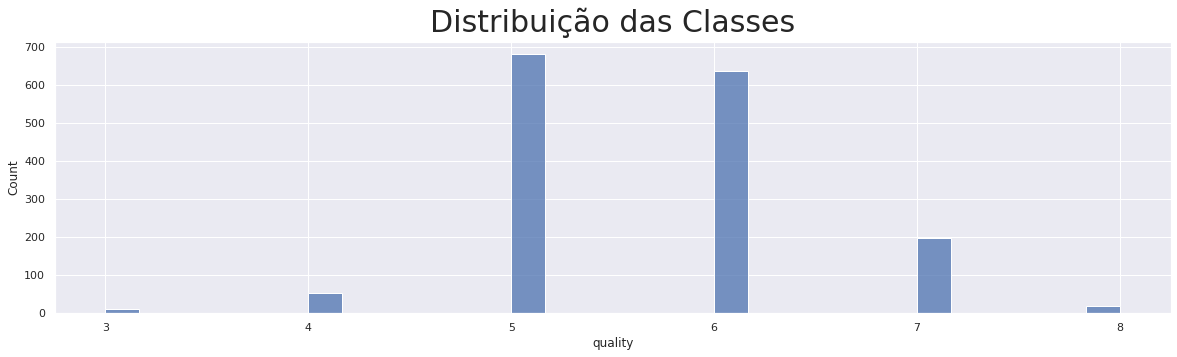

In [7]:
# Por aqui cosnsigo verificar que a base não é linear
# As clases que mais tem registros são: 5, 6 e 7

fig, ax = plt.subplots(figsize = (20,5))

ax.set_title('Distribuição das Classes', fontdict={'fontsize':30}, pad = 10)

sns.histplot(df['quality'], ax = ax);

print(df['quality'].value_counts())

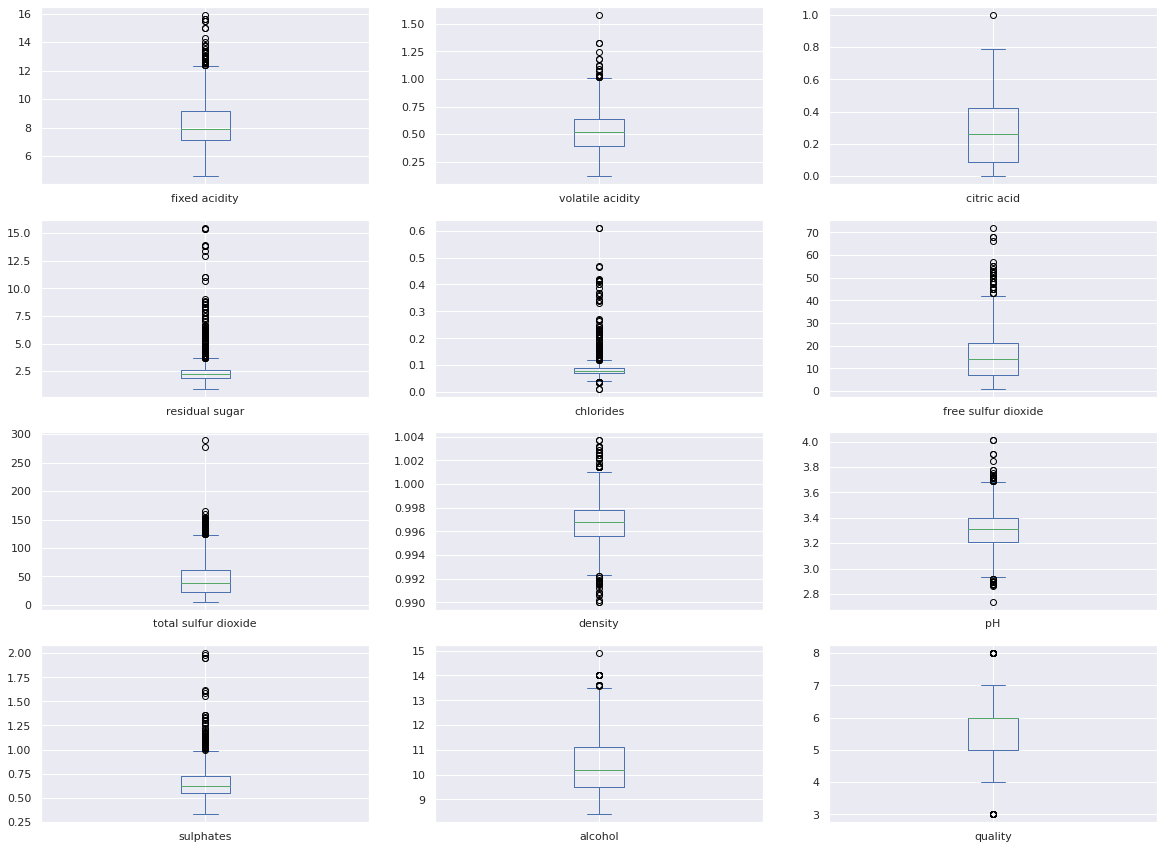

In [8]:
df.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

Através dos Boxplots consigo verificar que a base possui muitos outliers. Creio que da forma como estão, estes dados podem contribuir para penalizar a performance do modelo de alguma forma.

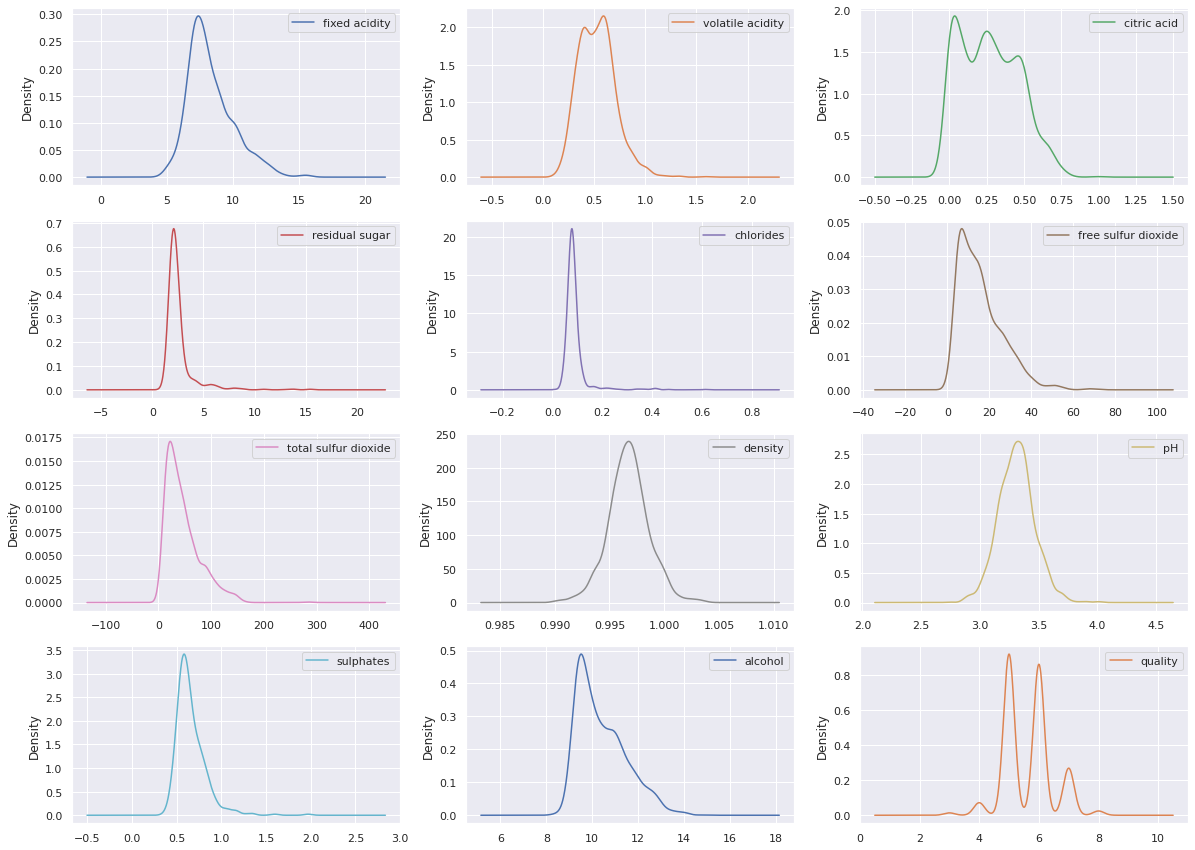

In [9]:
df.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

Com Density consigo verificar de forma muito rápida como estão distribuidos os dados dentro da minha base.
Aparentemente não tenho nada que chame atenção em relação a desbalanceamento. Porem as variávies que identificamos anteriormente como tendo pouca correlação com a variável alvo aprensentam de uma distribuição não muito "normal".

In [10]:
# Verificando a correlação das variáveis com o Alvo
cor = df.corr()['quality'].drop(['quality'])
cor

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

De cara já consigo notar que as variáveis preditoras 'residual sugar, free sulfur dioxide e pH' possuem pouca relação com a variável alvo.

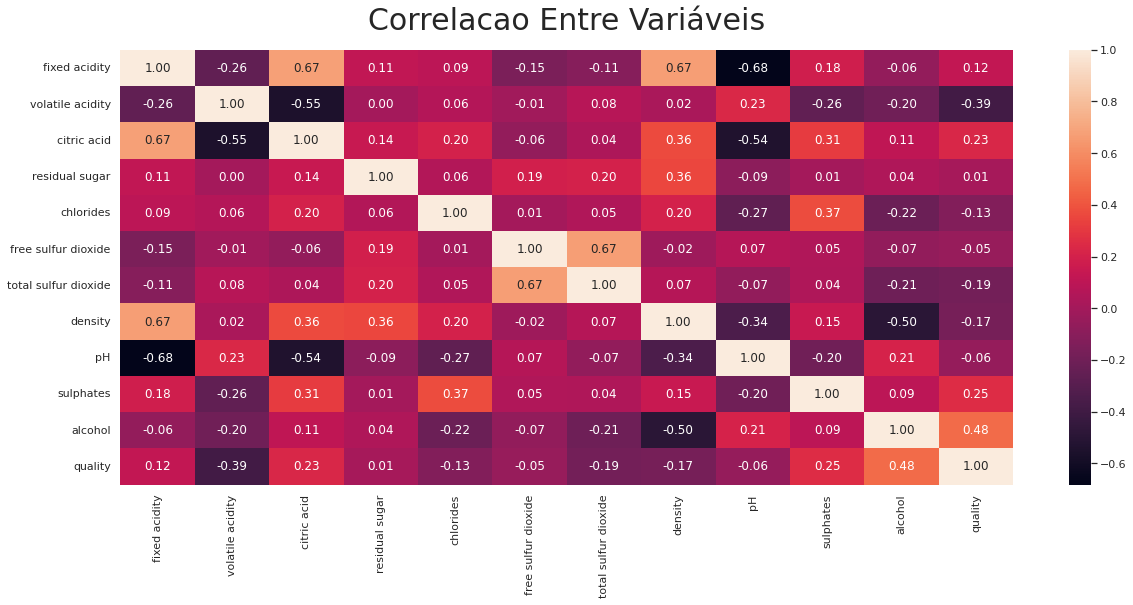

In [11]:
fig, ax = plt.subplots(figsize = (20,8))

ax.set_title('Correlacao Entre Variáveis', fontdict={'fontsize':30}, pad = 20)

sns.heatmap(df.corr(), annot= True, fmt = '.2f');

## **IMPRESSÃO SOBRE OS DADOS**

COnforme já mensionado, existem variáveis que possuem pouca correalação com a variável alvo e podem ser tiradas do DataFrame para aplicação do modelo.


Outro ponto que chama atenção é que aparentemente esta base possui bastante outliers, o que pode fazer com que o modelo seja penalizado de alguma forma.

Por conta disso, irei trabalhar com uma base “normal’ e se o modelo não apresentar uma performance razoável, vou refazer o processo retirando os outliers. 


## **PRÉ PROCESSAMENTO DOS DADOS**

Como parte das premissas básicas de um bom modelo de regressão, o ideal é que as variáveis preditoras tenham pouca ou nenhuma correlação entre si. Isso pode acabar poder deixar o modelo com uma performance muito boa com os dados de treino, porem com pouca capacidade de aprendizado durante a implementação com dados do dia a dia. 

Por conta disso, as variávies com correlação maior do 0.5 estão sendo removidas do DataFrame.



In [12]:

cor_tot = df.corr().abs()
superior = cor_tot.where(np.triu(np.ones(cor_tot.shape), k = 1).astype(np.bool))
remover = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]
df = df.drop(df[remover], axis = 1)

/tmp/ipykernel_107338/1851530039.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  superior = cor_tot.where(np.triu(np.ones(cor_tot.shape), k = 1).astype(np.bool))


In [13]:
df

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,6
4,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,39.0,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,29.0,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,32.0,0.71,10.2,5


In [14]:
# Separando os dados entre variáveis preditoras e variável alvo
x = df.drop('quality', axis = 1)
y = df['quality']

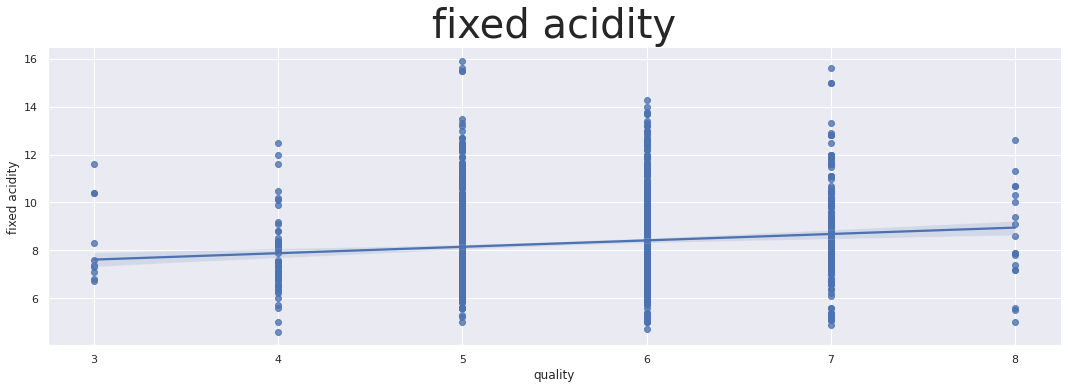

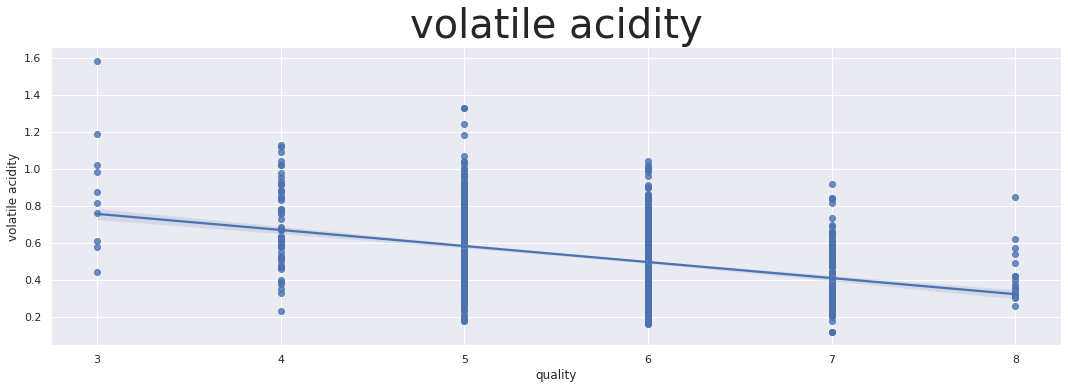

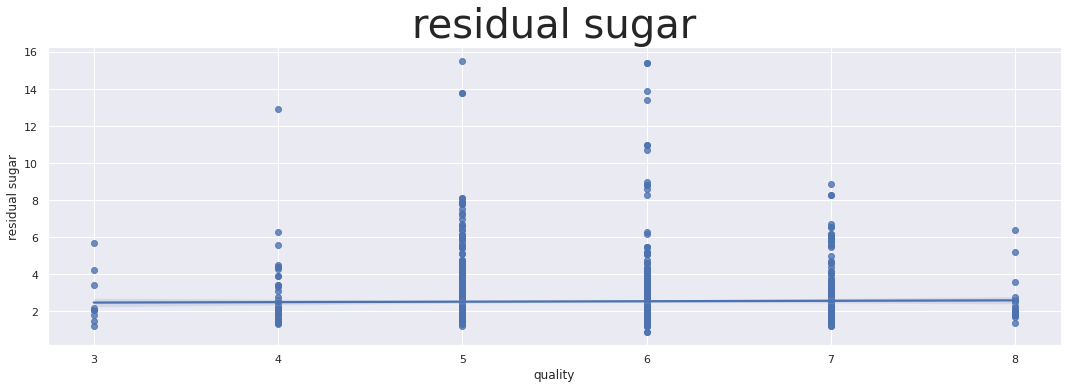

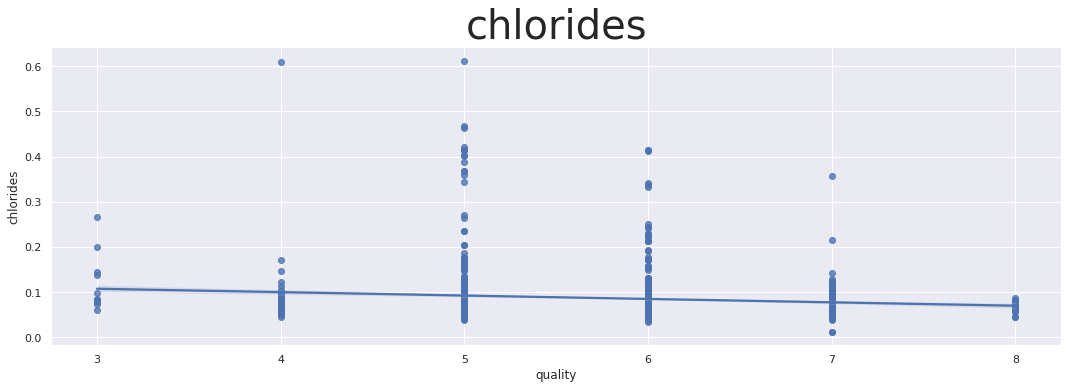

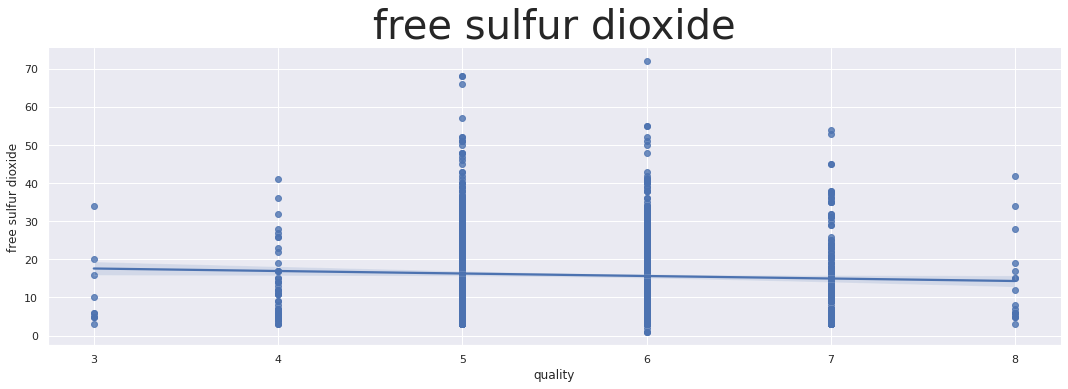

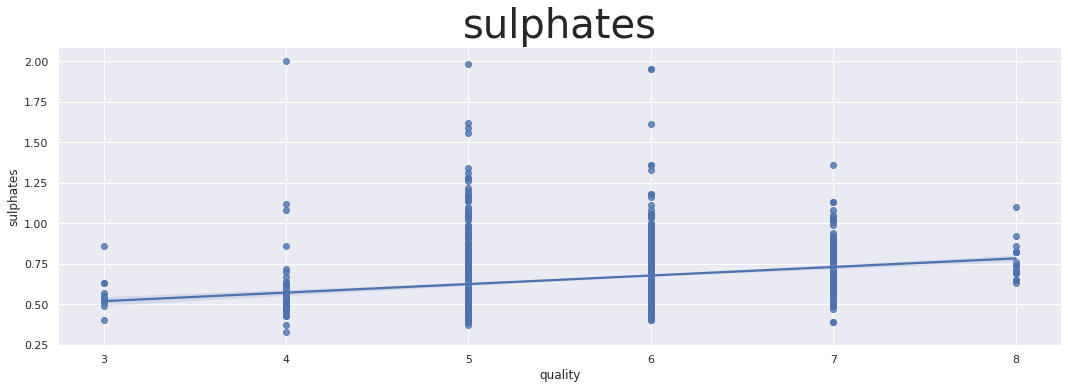

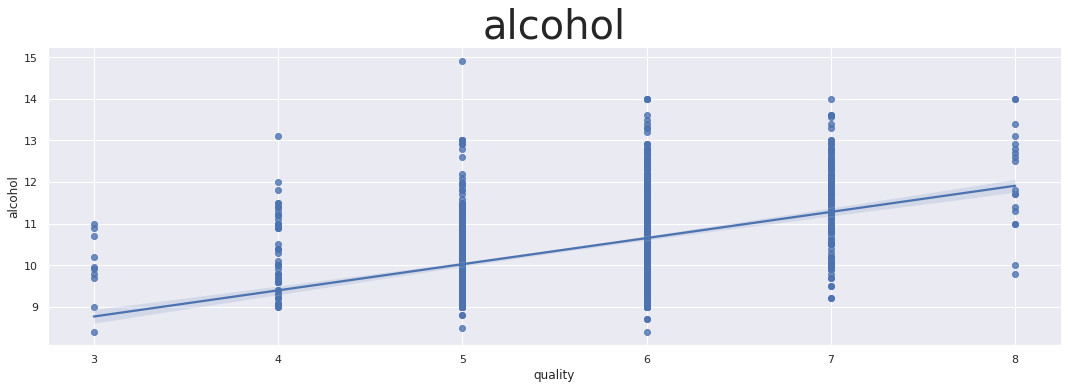

In [15]:
''' Na sequencia resolvo plotar as correlações entra cada variável preditora com o alvo de forma individual
 Como já havia observado anteriormente, as variáveis 'residual sugar' e 'free sulfur dioxide' não possuem 
 correlação com o alvo.
 
 Neste caso, resolvo tirar estas variáveis antes de começar a trabalhar no modelo

 Aqui tambem vale uma observação. Como rodei o Statsmodels logo abaixo, consgui ver que a variável free sulfur dioxide possui 
 um P value muito elevado, logo resolvi tira-la do modelo para ver o resultado

 Acabou que tive uma melhora imperceptivel no modelo. 
 
 '''

for i in x.columns:
    sns.lmplot(y = i, x = 'quality', data = df,  height = 5, aspect = 3)
    plt.title(i, fontdict={'fontsize': 40}, pad = 10)

Aqui consigo ver que as variáveis preditoras 'residual sugar','free sulfur dioxide' e 'fixed acidity' não aprensentam uma relação linear com a variável alvo. 

Tambem é possivel notar que o modelo de regressão não é o modelo mais adequado para esta base de dados. Mas como o objetivo do estudo é a regressão, seguirei nele. 

In [16]:
# Removendo as variáveis com pouca relação lienar com o avlo.

x = x.drop(['residual sugar','free sulfur dioxide', 'fixed acidity'], axis = 1)
y = y

In [17]:
x.head()

,volatile acidity,chlorides,sulphates,alcohol
0,0.70,0.076,0.56,9.4
1,0.88,0.098,0.68,9.8
2,0.76,0.092,0.65,9.8
3,0.28,0.075,0.58,9.8
4,0.70,0.076,0.56,9.4


## **PRE PROCESSAMENTO DOS DADOS**

In [18]:
'''Aqui resolvo fazer a separação da base em treino e teste
O tamanho o percentual que opto para fazer o split nos dados é de 30%
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .30, random_state= 43)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1119, 4), (1119,), (480, 4), (480,))

## **APLICANDO A REGRESSÃO**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
lr = LinearRegression()

lr.fit(x_train, y_train)

predicao_treino = lr.predict(x_train)
predicao_teste= lr.predict(x_test)

predicao_teste.shape, x_train.shape

#### verificando a performance do modelo
#===========================================================================
# Dados de teste
mae_test = mean_absolute_error(y_test, predicao_teste)
r2_test = r2_score(y_test, predicao_teste)
rmse_test = np.sqrt(mean_absolute_error(y_test, predicao_teste))

print('PERFORMANCE COM DADOS DE TREINO')
print(f'MAE {round(mae_test,2)}')
print(f'R2 {round(r2_test,2)}')
print(f'RMSE {round(rmse_test,2)}')

print()

#===========================================================================
#Dados de treino
mae_treino = mean_absolute_error(y_train, predicao_treino)
r2_treino = r2_score(y_train, predicao_treino)
rmse_treino = np.sqrt(mean_absolute_error(y_train, predicao_treino))

print('PERFORMANCE COM DADOS DE TESTE')
print(f'MAE {round(mae_treino,2)}')
print(f'R2 {round(r2_treino,2)}')
print(f'RMSE {round(rmse_treino,2)}')



PERFORMANCE COM DADOS DE TREINO
MAE 0.52
R2 0.37
RMSE 0.72

PERFORMANCE COM DADOS DE TESTE
MAE 0.51
R2 0.32
RMSE 0.72


In [20]:
# 
print(f'Qualidade média da Base do Vinho {round(y_test.mean(),2)}')
print()
print('O percentual do MAE em relação a média da base é:')
print(f'{round(mae_test / y_test.mean(),2) * 100} ')

Qualidade média da Base do Vinho 5.7

O percentual do MAE em relação a média da base é:
9.0 


## **IMPRESSÕES SOBRE O MODELO**

Notas-se que o modelo aprensenta estabilidade. Isso pode ser comprovado comparando-se a performance do modelo tanto na base de testes quanto na base de treino. Os resultados foram muito parecidos. Porem, isso não quer dizer o que modelo é bom para a base de dados. 

Nota-se que o R2 é muito baixo. Mesmo com a remoção das variáveis que aprensentavam pouca correlação com o alvo. 


## **VERIFICANDO COEFICIENTES DA REGRESSÃO**

In [21]:
'''
Aqui consigo ver os coeficientes de cada uma das variáveis preditoras dentro do modelo
'''
coef = pd.DataFrame(lr.coef_, x.columns)
coef.columns = ['Coeficientes']

coef

,Coeficientes
volatile acidity,-1.280141
chlorides,-1.380083
sulphates,0.711966
alcohol,0.275111


In [22]:
'''
Com o método intercept_ consigo pegar o intercepto do modelo.
Desta forma, caso fosse necessario criar um programa ou mesmo uma planilha de excel com base nos dados deste modelo
eu teria condições porque o modelo me apresentou todos os valores
'''
lr.intercept_

3.0806003759469935

## **REFAZENDO O MODELO COM STATSMODELS**

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm = sm.OLS(y_train, x_train_).fit()

y_pre_test_sm = lr_sm.predict(x_test_)

lr_sm.summary()



/home/evaldoj/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           3.45e-93
Time:                        19:32:19   Log-Likelihood:                -1110.2
No. Observations:                1119   AIC:                             2230.
Df Residuals:                    1114   BIC:                             2256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0806      0.240     12.826      0.000       2.609       3.552
volatile acidity    -1.2801      0.117    -10.941      0.000      -1.510      -1.051
chlorides           -1.3801      0.528     -2.616      0.009      -2.415      -0.345
sulphates            0.7120      0.127      5.623      0.000       0.464       0.960
alcohol              0.2751      0.020     13.977      0.000       0.236       0.314
==============================================================================
Omnibus:                        6.287   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                7.743
Skew:                          -0.058   Prob(JB):                       0.0208
Kurtosis:                       3.391   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **CONSLUSÃO**
Fica claro que a regressão sem dúvida alguma não é a melhor forma de trabalhar com este conjunto de dados.

O foco do trabalho foi aplicar todos os conceitos fundamentais da regressão, desde a análise de dados até a aplicação do modelo atendendo todos os requisitos que o modelo de regressão linear exige. 

Algo interessante que gostei de aplicar, foi a questão do statsmodels. Achei o relatório que a biblioteca fornece muito legal. 
